In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:

data = pd.read_excel("dataset.xlsx")
data.head(2)

,Country,Years,Month,M1,exchange rate,Inflation,Stock market
0,Nigeria,2024,1,31555882.24,1607.00,29.9,100568.60
1,Nigeria,2024,2,30277249.26,1529.01,31.7,100057.49


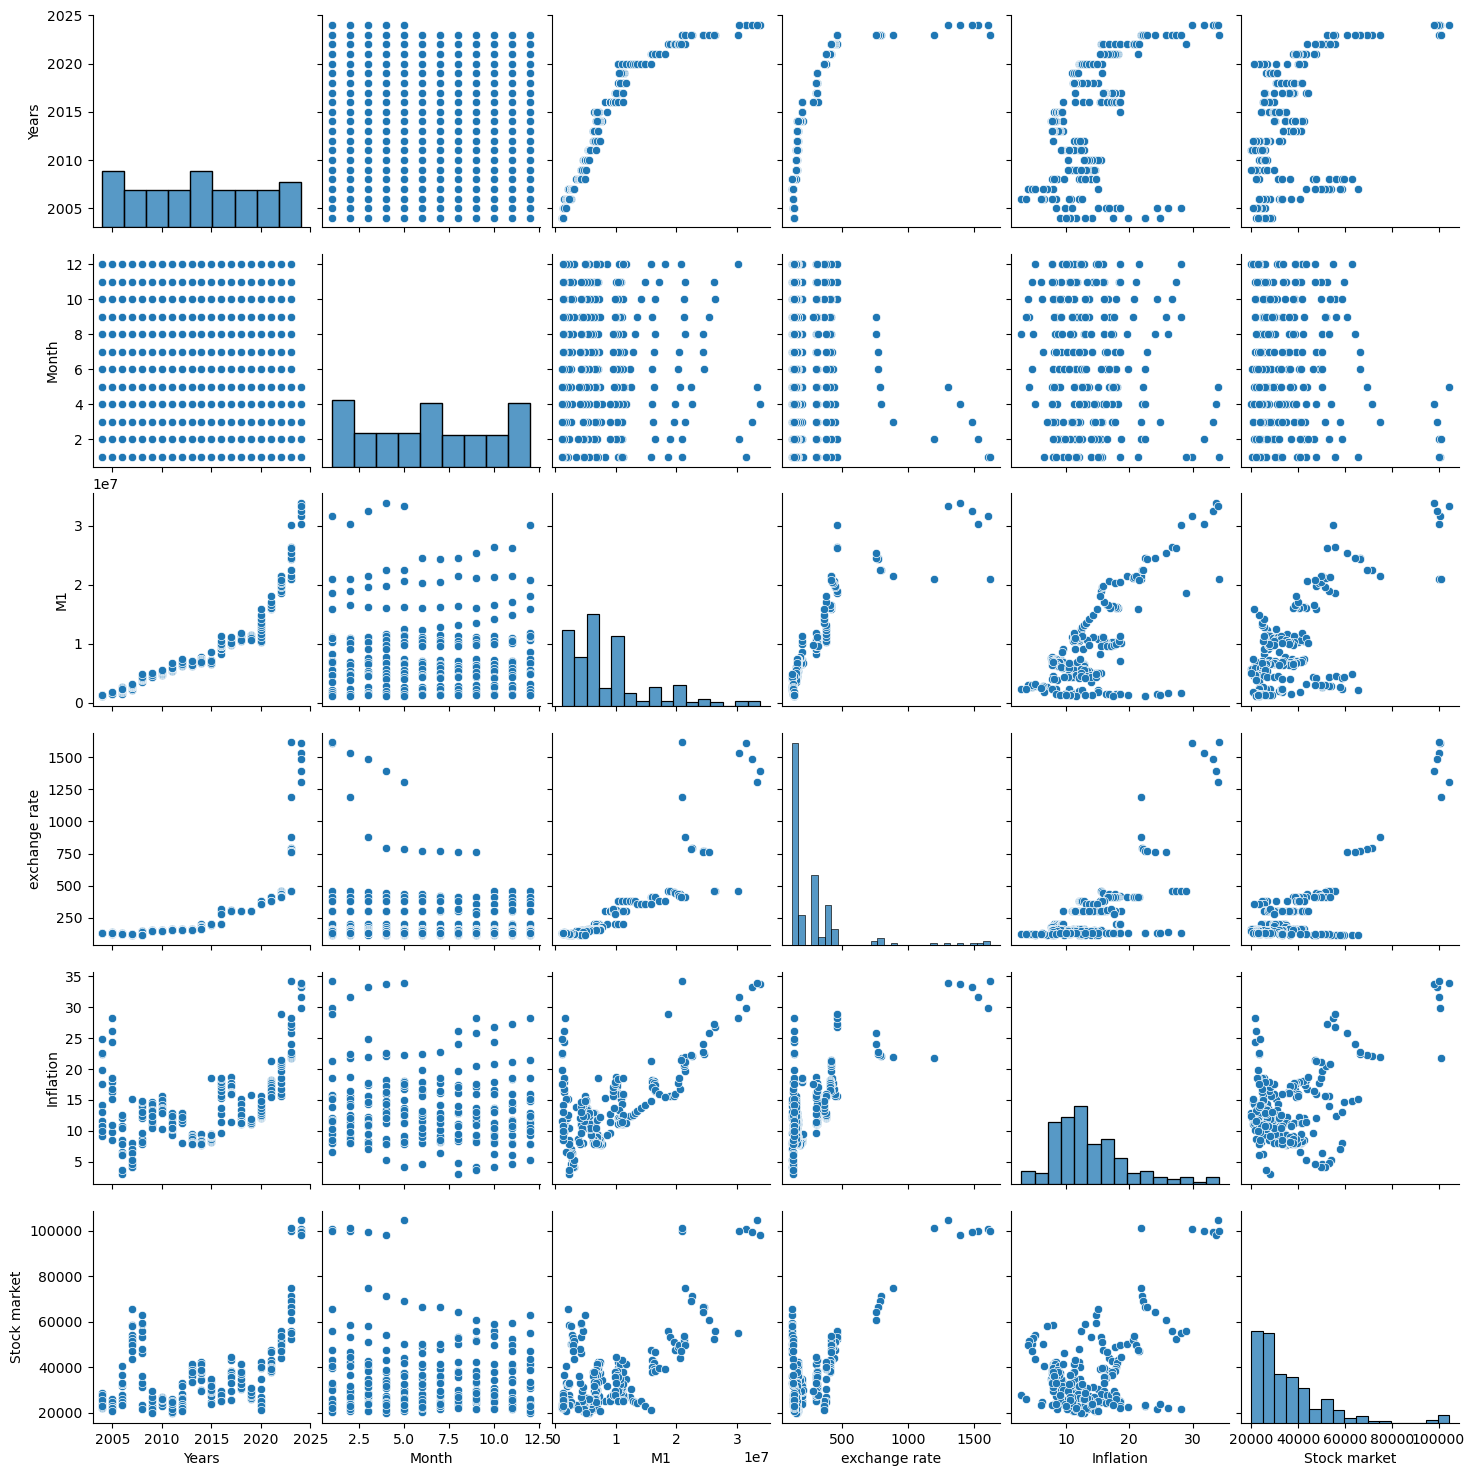

In [4]:
 #Visualize the relationships
sns.pairplot(data)
plt.show()

In [5]:
 #Calculate the correlation matrix
correlation_matrix = data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_9292\1144060627.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [6]:
# Display the correlation matrix
print(correlation_matrix)


                  Years     Month        M1  exchange rate  Inflation  \
Years          1.000000 -0.036026  0.901833       0.693684   0.460800   
Month         -0.036026  1.000000 -0.015188      -0.174873  -0.090973   
M1             0.901833 -0.015188  1.000000       0.850541   0.672721   
exchange rate  0.693684 -0.174873  0.850541       1.000000   0.707093   
Inflation      0.460800 -0.090973  0.672721       0.707093   1.000000   
Stock market   0.462838 -0.134284  0.666294       0.780014   0.485197   

               Stock market  
Years              0.462838  
Month             -0.134284  
M1                 0.666294  
exchange rate      0.780014  
Inflation          0.485197  
Stock market       1.000000  


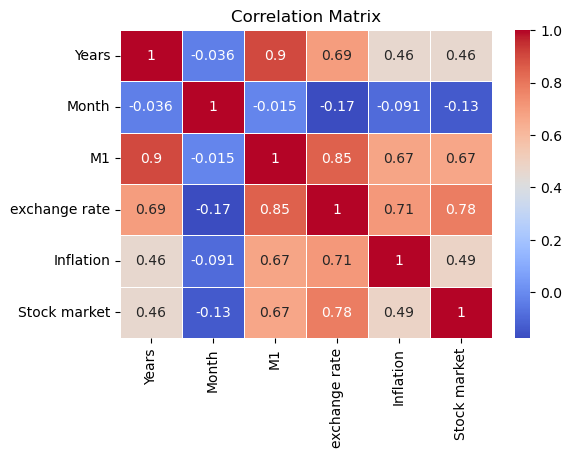

In [30]:
# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Create lagged versions of M1 Money Supply
data['M1_Lag1'] = data['M1'].shift(1)
data['M1_Lag2'] = data['M1'].shift(2)

In [9]:
# Drop rows with NaN values resulting from the lag
data = data.dropna()

In [10]:
# Display the first few rows of the updated data
data.head()

,Country,Years,Month,M1,exchange rate,Inflation,Stock market,M1_Lag1,M1_Lag2
2,Nigeria,2024,3,32489908.18,1484.00,33.20,99300.62,30277249.26,31555882.24
3,Nigeria,2024,4,33818990.81,1389.00,33.69,98225.63,32489908.18,30277249.26
4,Nigeria,2024,5,33382632.88,1303.00,33.95,104562.06,33818990.81,32489908.18
5,Nigeria,2023,1,20911067.86,1616.55,34.19,99980.30,33382632.88,33818990.81
6,Nigeria,2023,2,20958760.95,1191.94,21.82,101154.46,20911067.86,33382632.88


In [11]:
# Calculate the time-shifted correlation matrix
time_shifted_correlation_matrix = data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_9292\19177480.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  time_shifted_correlation_matrix = data.corr()


In [12]:
# Display the time-shifted correlation matrix
print(time_shifted_correlation_matrix)

                  Years     Month        M1  exchange rate  Inflation  \
Years          1.000000 -0.015900  0.905697       0.712770   0.439787   
Month         -0.015900  1.000000  0.023470      -0.129615  -0.058916   
M1             0.905697  0.023470  1.000000       0.847276   0.645380   
exchange rate  0.712770 -0.129615  0.847276       1.000000   0.683871   
Inflation      0.439787 -0.058916  0.645380       0.683871   1.000000   
Stock market   0.440633 -0.094476  0.629335       0.740979   0.431549   
M1_Lag1        0.900022 -0.048448  0.977105       0.865275   0.670478   
M1_Lag2        0.895538 -0.087229  0.962186       0.873148   0.647649   

               Stock market   M1_Lag1   M1_Lag2  
Years              0.440633  0.900022  0.895538  
Month             -0.094476 -0.048448 -0.087229  
M1                 0.629335  0.977105  0.962186  
exchange rate      0.740979  0.865275  0.873148  
Inflation          0.431549  0.670478  0.647649  
Stock market       1.000000  0.643588  0.6

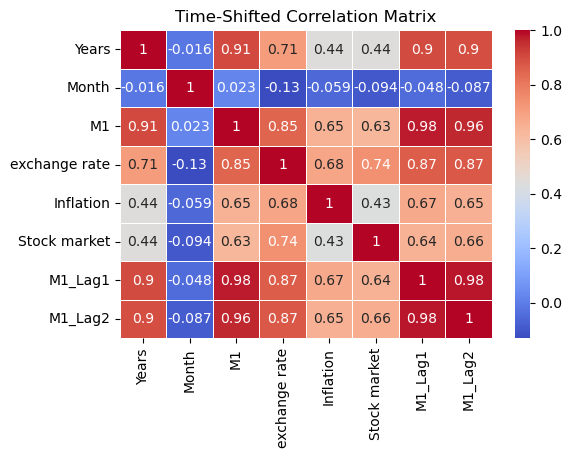

In [37]:
# Plot the time-shifted correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(time_shifted_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Time-Shifted Correlation Matrix')
plt.show()

In [14]:
# Function to calculate lagged correlations
def calculate_lagged_correlations(data, lag=1):
    lagged_data = data.shift(lag)
    return data.corrwith(lagged_data, axis=0)



In [15]:
# Calculate lagged correlations up to 12 months (1 year)
lags = range(1, 13)
lagged_correlations = pd.DataFrame({
    'Lag': lags,
    'M1-Stock market': [calculate_lagged_correlations(data[['M1', 'Stock market']], lag)['M1'] for lag in lags],
    'Exchange rate-Inflation': [calculate_lagged_correlations(data[['exchange rate', 'Inflation']], lag)['exchange rate'] for lag in lags],
    'Exchange rate-Stock market': [calculate_lagged_correlations(data[['exchange rate', 'Stock market']], lag)['exchange rate'] for lag in lags],
    'Inflation-Stock market': [calculate_lagged_correlations(data[['Inflation', 'Stock market']], lag)['Inflation'] for lag in lags],
})



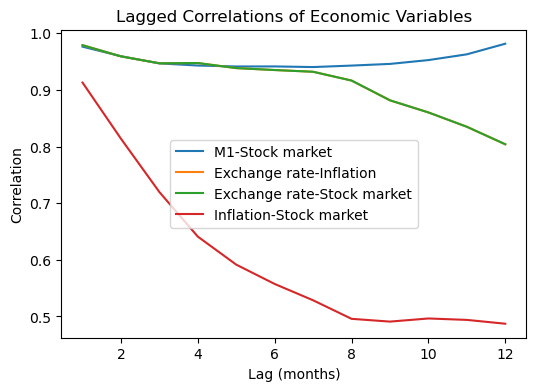

In [31]:
# Plot the lagged correlations and save it
plt.figure(figsize=(6, 4))
sns.lineplot(data=lagged_correlations, x='Lag', y='M1-Stock market', label='M1-Stock market')
sns.lineplot(data=lagged_correlations, x='Lag', y='Exchange rate-Inflation', label='Exchange rate-Inflation')
sns.lineplot(data=lagged_correlations, x='Lag', y='Exchange rate-Stock market', label='Exchange rate-Stock market')
sns.lineplot(data=lagged_correlations, x='Lag', y='Inflation-Stock market', label='Inflation-Stock market')
plt.xlabel('Lag (months)')
plt.ylabel('Correlation')
plt.title('Lagged Correlations of Economic Variables')
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Check for missing values
print(data.isnull().sum())


Country          0
Years            0
Month            0
M1               0
exchange rate    0
Inflation        0
Stock market     0
M1_Lag1          0
M1_Lag2          0
dtype: int64


In [19]:
# Define the productivity index
data['Productivity'] = data['M1'] / (data['exchange rate'] * data['Inflation'])

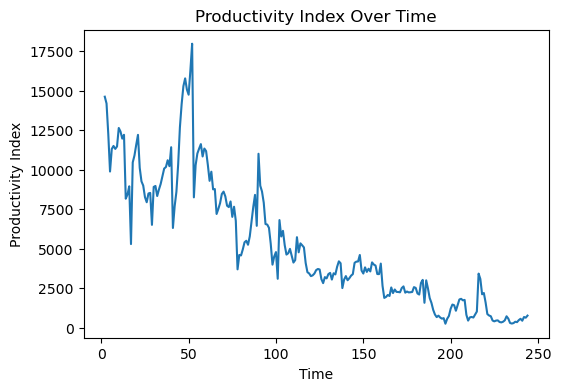

In [33]:
# Plot the productivity index over time
plt.figure(figsize=(6, 4))
sns.lineplot(x=data.index, y=data['Productivity'])
plt.xlabel('Time')
plt.ylabel('Productivity Index')
plt.title('Productivity Index Over Time')
plt.savefig('productivity_index.png')
plt.show()

In [21]:
# Calculate the baseline productivity
baseline_productivity = data['Productivity'].mean()

In [22]:
# Define the reference currency parameters (flat M1 growth and stable productivity)
# For simplicity, assume M1 growth = 1 (flat), exchange rate = 1, inflation = 1
reference_currency_productivity = 1  # M1 / (ER * I) = 1 / (1 * 1) = 1

# Calculate real currency devaluation as the ratio of target productivity to reference productivity
data['Real Devaluation'] = baseline_productivity / reference_currency_productivity



In [23]:
# Display the baseline productivity and real devaluation
print('Baseline Productivity:', baseline_productivity)
print('Real Devaluation:', data['Real Devaluation'].iloc[0])  # Real devaluation is constant

Baseline Productivity: 2794.404838324856
Real Devaluation: 2794.404838324856


In [24]:
# Save the plot as an image
plt.savefig('productivity_index.png')

<Figure size 640x480 with 0 Axes>

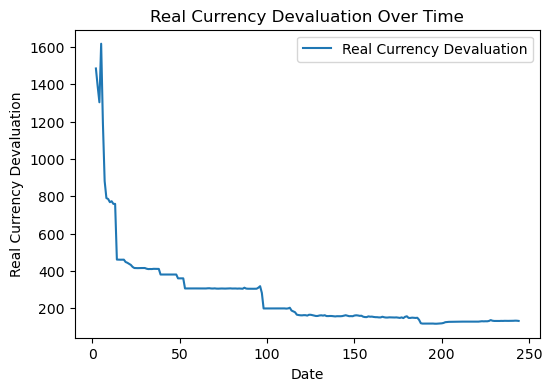

In [35]:
 #Assuming a reference currency with flat M1 growth and stable productivity
reference_currency_exchange_rate = 1  # Assuming a stable exchange rate of 1 for simplicity

data['Real Currency Devaluation'] = data['exchange rate'] / reference_currency_exchange_rate

# Plot the real currency devaluation over time
plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Real Currency Devaluation'], label='Real Currency Devaluation')
plt.title('Real Currency Devaluation Over Time')
plt.xlabel('Date')
plt.ylabel('Real Currency Devaluation')
plt.legend()
plt.show()

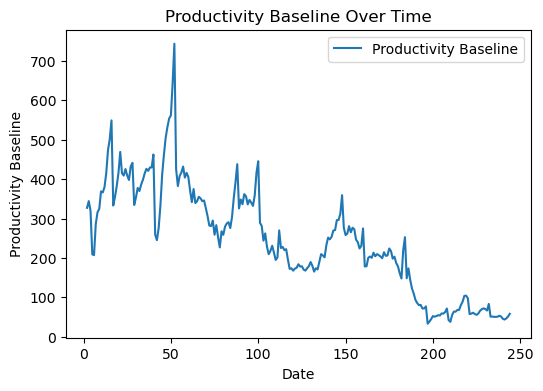

In [34]:
#  productivity baseline: (M1 Money Supply / Stock Market Index)
data['Productivity Baseline'] = data['M1'] / data['Stock market']

# Plot the productivity baseline over time
plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Productivity Baseline'], label='Productivity Baseline')
plt.title('Productivity Baseline Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity Baseline')
plt.legend()
plt.show()

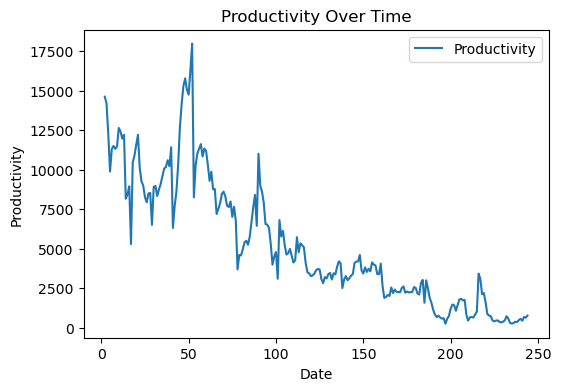

In [36]:
# Theoretical framework:  productivity = (M1 Money Supply / Inflation Rate) * Exchange Rate / Stock Market Index
data['Productivity'] = (data['M1'] / data['Inflation']) * data['exchange rate'] / data['Stock market']  

# Plot the productivity over time
plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Productivity'], label='Productivity')
plt.title('Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.show()